# Student Placement prediction

In [1]:
#import libarise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df=pd.read_csv('C:\\collegePlace2.csv')
df

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


In [3]:
# Getting to know the shape of data
df.shape


(2966, 8)

In [4]:
# showing the first 5 rows of the dataset
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
# statistical Descriptions of numerical values in the dataset
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.079568,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.970253,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
# Getting to know the detailed information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
# missing values
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [9]:
df = df.drop(columns=['Age', 'Hostel'])


In [10]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [11]:
from sklearn import preprocessing


In [12]:
# label encoding
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Stream'] = le.fit_transform(df['Stream'])


In [13]:
df.head()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1


In [14]:
df.describe()


,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.834457,2.562374,0.703641,7.079568,0.192178,0.552596
std,0.371732,1.653853,0.740197,0.970253,0.394079,0.497310
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,4.000000,1.000000,8.000000,0.000000,1.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [15]:
df['Stream'].unique()


array([3, 1, 4, 5, 2, 0])

<Axes: >

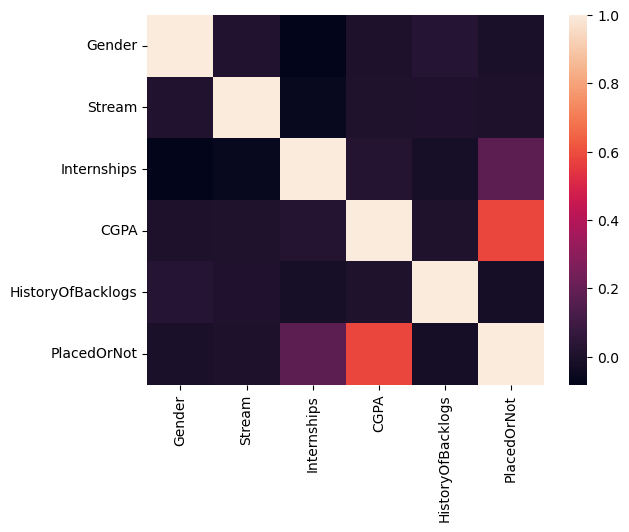

In [16]:
tc = df.corr()
sns.heatmap(tc)


In [17]:
x = df.drop(columns=['PlacedOrNot'])
x

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,1,3,1,8,1
1,0,1,0,7,1
2,0,4,1,6,0
3,1,4,0,8,1
4,1,5,0,8,0
...,...,...,...,...,...
2961,1,4,0,7,0
2962,1,5,1,7,0
2963,1,4,1,7,0
2964,1,1,1,7,0


In [18]:
y = df['PlacedOrNot']
y


0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

# split the dataset into train and test

In [19]:
# splitting the dataset into training and testing datasets.
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=51)


In [20]:
# Getting the shape of all the training and testing datset
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2076, 5)
(890, 5)
(2076,)
(890,)


# Traning and Evaluting the Model

# Support Vector Classification


In [21]:
from sklearn.svm import SVC

In [22]:
classification_rbf=SVC(kernel='rbf')
classification_rbf.fit(x_train,y_train)

SVC()

In [23]:
classification_rbf.score(x_test,y_test)

0.8539325842696629

# Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
classifier.score(x_test,y_test)

0.852808988764045

# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_predict=lr.predict(x_test)
lr.predict_proba(x_test)

array([[0.87675514, 0.12324486],
       [0.1951834 , 0.8048166 ],
       [0.09842222, 0.90157778],
       ...,
       [0.80445004, 0.19554996],
       [0.38111949, 0.61888051],
       [0.55931363, 0.44068637]])

In [29]:
lr.intercept_

array([-12.29591259])

In [30]:
lr.score(x_test,y_test)

0.7685393258426966

# K-fold 

In [36]:
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(digits.data,digits.target,test_size=0.3)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [39]:
lr=LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.9555555555555556